## Question 4

This notebook contains solutions of assignment AI 2022 Ege University

05180000094 - Okan Akyol
05190000061 - Oktay Kaloğlu 
05180000074 - Muhammed Emin Karslı

## Setup
First, let's import a few common modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


## Get the data from folder

Import data

In [2]:
pde = pd.read_csv("disase.csv")
pde.shape

(303, 14)

## We need to lookup a quick look at the data structure

In [3]:
pde.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Quick lookup for data info

In [4]:
pde.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
pde.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [6]:
pde.target.value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

## Verisetini inceleyip özet bilgileri rapora yazınız: Veri (örnek) sayısını, öznitelik (girdi) sayısını, özniteliklerin neler olduğunu, sınıf sayısını ve sınıfların neler olduğunu rapora yazınız.

## Data Set Proporties

**Feature Count: 14** 

**Category Count: 2**

In [7]:
pde.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:>

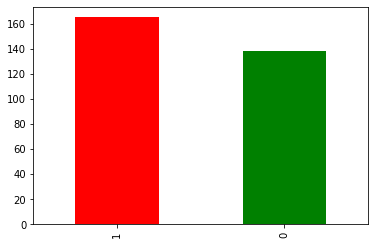

In [8]:
# Plot the value counts with a bar graph
pde.target.value_counts().plot(kind="bar", color=["red", "green"])

## Heart Disease Frequency according to Gender


In [9]:
pde.sex.value_counts()



1    207
0     96
Name: sex, dtype: int64

In [10]:
# Compare target column with sex column
pd.crosstab(pde.target, pde.sex)

sex,0,1
target,,
0,24,114
1,72,93


What can we infer from this? 
There are about 96 women and 72 of them have a hearth disease being present, we might infer, based on this one variable if the participant is a woman she is %75 chance she has hearth disease.

There is 207 men and almost half of them has heart disease so we might predict %50 chance the participant has hearth disease if participant is a male.

Averaging these two values, we can assume, based on no other parameters, if there's a person, there's a 62.5% chance they have heart disease.


## Making For Target-Sex Visualization

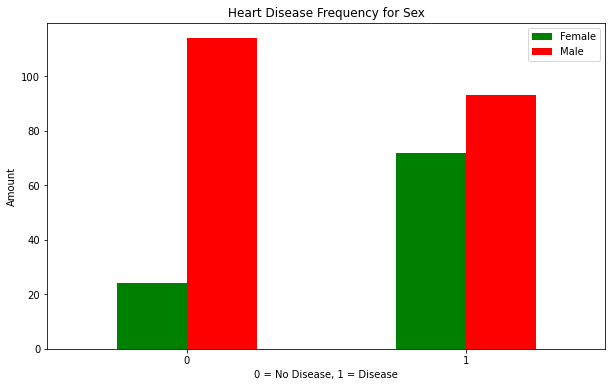

In [11]:
# Create a plot
pd.crosstab(pde.target, pde.sex).plot(kind="bar", 
                                    figsize=(10,6), 
                                    color=["green", "red"]);
# Add some attributes to it
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0); # keep the labels on the x-axis vertical
plt.xticks(rotation=0); # keep the labels on the x-axis vertical


## Age vs Max Hearth Rate for Hearth Disase


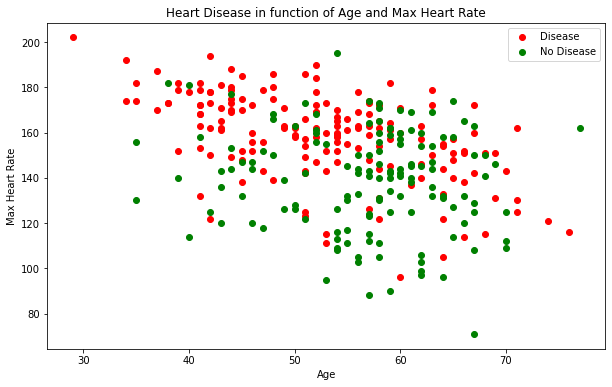

In [12]:
# Create another figure
plt.figure(figsize=(10,6))

# Start with positve examples
plt.scatter(pde.age[pde.target==1], 
            pde.thalach[pde.target==1], 
            c="red") # define it as a scatter figure

# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(pde.age[pde.target==0], 
            pde.thalach[pde.target==0], 
            c="green") # axis always come as (x, y)

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

It seems the younger someone is, the higher their max heart rate and the older someone is, the more green dots there are.

Both of these are observational of course, but this is what we're trying to do, build an understanding of the data.

## Correlation between independent variables


We can do this using df.corr() which will create a correlation matrix for us, in other words, a big table of numbers telling us how related each variable is the other.

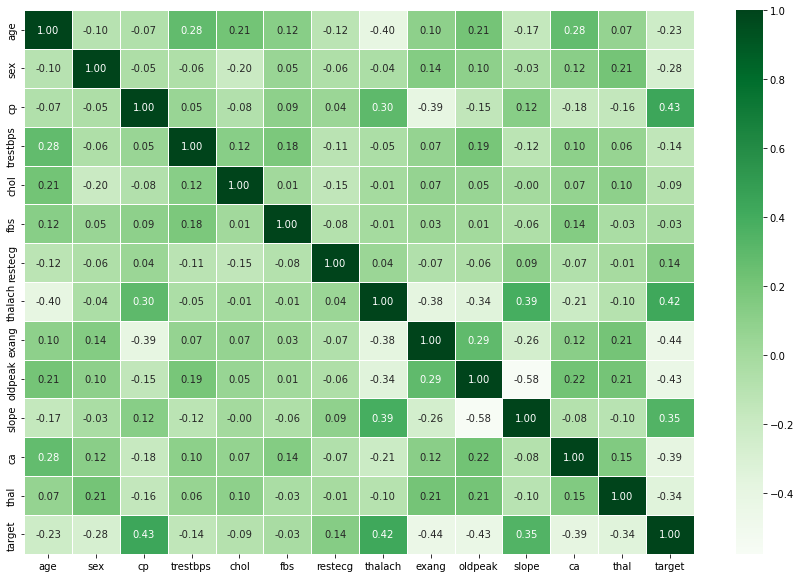

In [13]:
# Let's make it look a little prettier
corr_matrix = pde.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="Greens");

## İki farklı sınıflandırıcı (MLP Classifier YSA, SVM, k-NN, Decision Tree, Random Forest …) kullanarak sınıflandırma işlemini yapan Python kodunu yazınız.

## Modeling

**Our Problem: Given clinical parameters about a patient, can we predict whether or not they have heart disease?**

We're trying to predict our target variable using all of the other variables.

To do this, we'll split the target variable from the rest.

## Build Model With Random Forest Algorithm

In [14]:
# Everything except target variable
X = pde.drop("target", axis=1)
# Target variable
y = pde.target.values
# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.2) #
#prepare cross validation
cv = KFold(n_splits=10, random_state=1, shuffle=True)
clf = RandomForestClassifier(n_estimators=11)
clf = clf.fit(X_train,y_train)
y_preds = clf.predict(X_test)

## Confusion Matrix for Random Forest Alghoritm

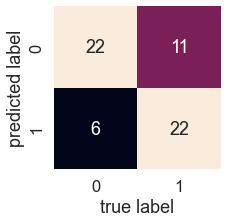

In [15]:

sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

## Classification Report

In [16]:
print(classification_report(y_test, y_preds))


              precision    recall  f1-score   support

           0       0.79      0.67      0.72        33
           1       0.67      0.79      0.72        28

    accuracy                           0.72        61
   macro avg       0.73      0.73      0.72        61
weighted avg       0.73      0.72      0.72        61



## Sınıflandırıcıların başarılarını Accuracy, Precision ve Recall cinsinden ölçerek bir tabloya kaydediniz 

## Accuracy, Precision and Recall Profiles Cross Validaton for Random Forest

In [17]:

# Cross-validated accuracy score
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=cv, # 10-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
# Cross-validated accuracy score
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=cv, # 10-fold cross-validation
                         scoring="precision") # accuracy as scoring
# Cross-validated accuracy score
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=cv, # 10-fold cross-validation
                         scoring="recall") # accuracy as scoring



print("Random Forest Report Validaton")
print("===============================")
print("%0.2f Accuracy with a standard deviation of %0.2f" % (cv_acc.mean(), cv_acc.std()))
print("%0.2f Precision with a standard deviation of %0.2f" % (cv_precision.mean(), cv_precision.std()))
print("%0.2f Recall with a standard deviation of %0.2f" % (cv_recall.mean(), cv_recall.std()))


Random Forest Report Validaton
0.79 Accuracy with a standard deviation of 0.09
0.79 Precision with a standard deviation of 0.13
0.84 Recall with a standard deviation of 0.11


## Build Model For KNN

              precision    recall  f1-score   support

           0       0.62      0.39      0.48        33
           1       0.50      0.71      0.59        28

    accuracy                           0.54        61
   macro avg       0.56      0.55      0.53        61
weighted avg       0.56      0.54      0.53        61



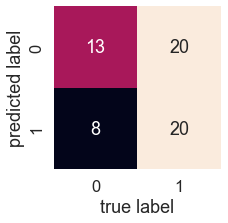

In [18]:
neigh = KNeighborsClassifier(n_neighbors=11)
#train model
neigh = neigh.fit(X_train, y_train)
y_preds_neigh = neigh.predict(X_test)
y_preds_neigh# Display confusion matrix
sns.set(font_scale=1.5) # Increase font size

plot_conf_mat(y_test, y_preds_neigh)
print(classification_report(y_test, y_preds_neigh))


In [19]:
# Cross-validated accuracy score
cv_acc_neigh = cross_val_score(neigh,
                         X,
                         y,
                         cv=cv, # 10-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
# Cross-validated accuracy score
cv_precision_neigh = cross_val_score(neigh,
                         X,
                         y,
                         cv=cv, # 10-fold cross-validation
                         scoring="precision") # accuracy as scoring
# Cross-validated accuracy score
cv_recall_neigh = cross_val_score(neigh,
                         X,
                         y,
                         cv=cv, # 10-fold cross-validation
                         scoring="recall") # accuracy as scoring



print("KNN Report Validaton")
print("===============================")
print("%0.2f Accuracy with a standard deviation of %0.2f" % (cv_acc_neigh.mean(), cv_acc.std()))
print("%0.2f Precision with a standard deviation of %0.2f" % (cv_precision_neigh.mean(), cv_precision.std()))
print("%0.2f Recall with a standard deviation of %0.2f" % (cv_recall_neigh.mean(), cv_recall.std()))


KNN Report Validaton
0.64 Accuracy with a standard deviation of 0.09
0.66 Precision with a standard deviation of 0.13
0.73 Recall with a standard deviation of 0.11


## Kullanıcının girdiği yeni (sınıfı bilinmeyen) bir örneğe ilişkin özniteliklerin yani örüntünün (pattern) hangi sınıfa ait olduğunu buldurunuz.


In [20]:
new_input_predict = pd.read_csv("input.csv")
y_preds_neigh = neigh.predict(new_input_predict)
y_preds_neigh


array([0, 0, 0, 0, 0, 1, 0, 0, 1, 1], dtype=int64)